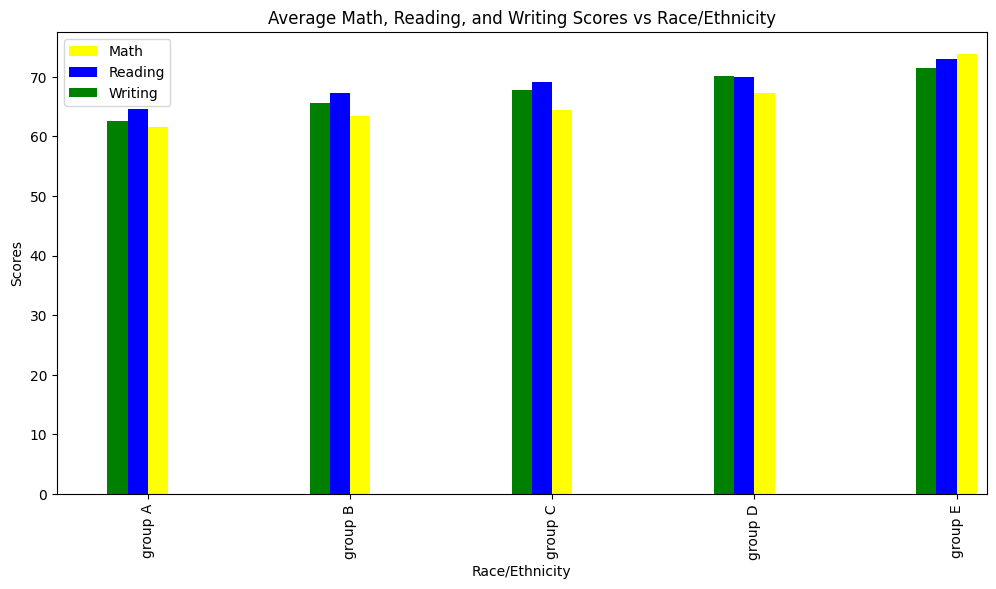

In [34]:
# Create a plot showing the math, reading and writing scores vs. race/ethnicity.  
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\ammu0\.vscode\python\StudentsPerformance.csv')
plt.figure(figsize=(12, 6))
data.groupby('race/ethnicity')['math score'].mean().plot(kind='bar', color='yellow', position=0, width=0.10)
data.groupby('race/ethnicity')['reading score'].mean().plot(kind='bar', color='blue', position=1, width=0.10)
data.groupby('race/ethnicity')['writing score'].mean().plot(kind='bar', color='green', position=2, width=0.10)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Scores')
plt.title('Average Math, Reading, and Writing Scores vs Race/Ethnicity')
plt.legend(['Math', 'Reading', 'Writing'])
plt.show()



<Figure size 1200x600 with 0 Axes>

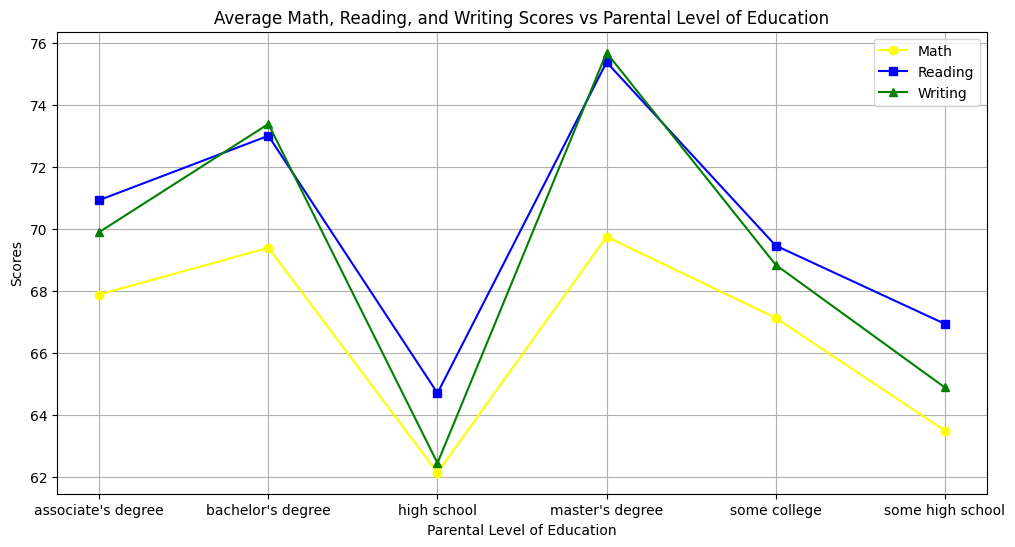

In [35]:
# Create a plot showing the math, reading and writing scores vs. parental level of education
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
data.groupby('parental level of education')['math score'].mean().plot(kind='line', marker='o', color='yellow')
data.groupby('parental level of education')['reading score'].mean().plot(kind='line', marker='s', color='blue')
data.groupby('parental level of education')['writing score'].mean().plot(kind='line', marker='^', color='green')
plt.xlabel('Parental Level of Education')
plt.ylabel('Scores')
plt.title('Average Math, Reading, and Writing Scores vs Parental Level of Education')
plt.legend(['Math', 'Reading', 'Writing'])
plt.grid(True)
plt.show()

In [36]:
# Create a plot showing the math, reading and writing scores vs. parental level of education
filtered_data = data[(data['gender'] == 'female') & (data['race/ethnicity'] == 'group A') & (data['test preparation course'] == 'completed')]

import pyodbc as py

conn = py.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                  'SERVER= MADHURI;'
                  'DATABASE=studentperformances;'
                  'trusted_Connection=yes;')
cursor = conn.cursor()

cursor.execute("IF OBJECT_ID('FemaleGroupACompletedScores', 'U') IS NOT NULL DROP TABLE FemaleGroupACompletedScores")

cursor.execute('''
                CREATE TABLE FemaleGroupACompletedScores (
                    gender VARCHAR(10),
                    race_ethnicity VARCHAR(10),
                    test_preparation_course VARCHAR(20),
                    math_score INT,
                    reading_score INT,
                    writing_score INT
                )
                ''')


for index, row in filtered_data.iterrows():
    cursor.execute("INSERT INTO FemaleGroupACompletedScores (gender, race_ethnicity, test_preparation_course, math_score, reading_score, writing_score) values (?, ?, ?, ?, ?, ?)",
                   row['gender'], row['race/ethnicity'], row['test preparation course'], row['math score'], row['reading score'], row['writing score'])

query = "SELECT * FROM FemaleGroupACompletedScores"
df = pd.read_sql(query, conn)
print(df)

conn.commit()
conn.close()

    gender race_ethnicity test_preparation_course  math_score  reading_score  \
0   female        group A               completed          55             65   
1   female        group A               completed          59             85   
2   female        group A               completed          77             88   
3   female        group A               completed          92            100   
4   female        group A               completed          68             80   
5   female        group A               completed          65             70   
6   female        group A               completed          72             79   
7   female        group A               completed          85             90   
8   female        group A               completed          75             82   
9   female        group A               completed          34             48   
10  female        group A               completed          53             50   
11  female        group A               

C:\Users\ammu0\AppData\Local\Temp\ipykernel_29936\1204272091.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
